# Introduction

### Neighborhood Watch: Finding the Best Neighborhood in Pittsburgh

Our project, **Neighborhood Watch**, seeks to answer a critical question for residents, families, and city planners alike:  
**What is the best neighborhood in Pittsburgh?**  

Using open data from the **Western Pennsylvania Regional Data Center (WPRDC)**, our team conducted a multi-factor analysis of Pittsburgh’s neighborhoods to evaluate quality-of-life indicators.

## Our Approach

We began by identifying which factors most significantly impact the day-to-day experiences of residents.  
After exploring several alternatives—including metrics focused on:

1. **Public Safety** *(Arrest Rates)*  
2. **Child-Friendly Amenities** *(Playgrounds)*  
3. **Community Vitality** *(School Enrollment)*

Each dataset represents a different, yet complementary, aspect of what makes a neighborhood **livable and welcoming**.


# Metric

To objectively evaluate Pittsburgh’s neighborhoods, we designed a composite scoring system that combines three features:

- **Arrest Rate (Weight: 45%)**  
  Interpreted as a measure of safety; fewer arrests imply a safer neighborhood.  
  Dataset: Arrest Data

- **Playgrounds per Neighborhood (Weight: 20%)**  
  Acts as a proxy for recreational and family-friendly infrastructure.  
  Dataset: Playgrounds Dataset

- **Student Enrollment Numbers (Weight: 35%)**  
  Reflects the population of families and the strength of the local educational community.  
  Dataset: Pittsburgh Public Schools Enrollment

---

### Scoring Method

Each neighborhood is assigned a score from 0 to 1 for each metric, where:

- A higher Playgrounds or Enrollment score is better  
- A lower Arrest rate results in a higher normalized score (i.e., inverse relationship)

We then apply the assigned weights to these normalized scores and compute a final composite score for each neighborhood:



# Bar Graph of Neighborhoods with the Fewest Arrests

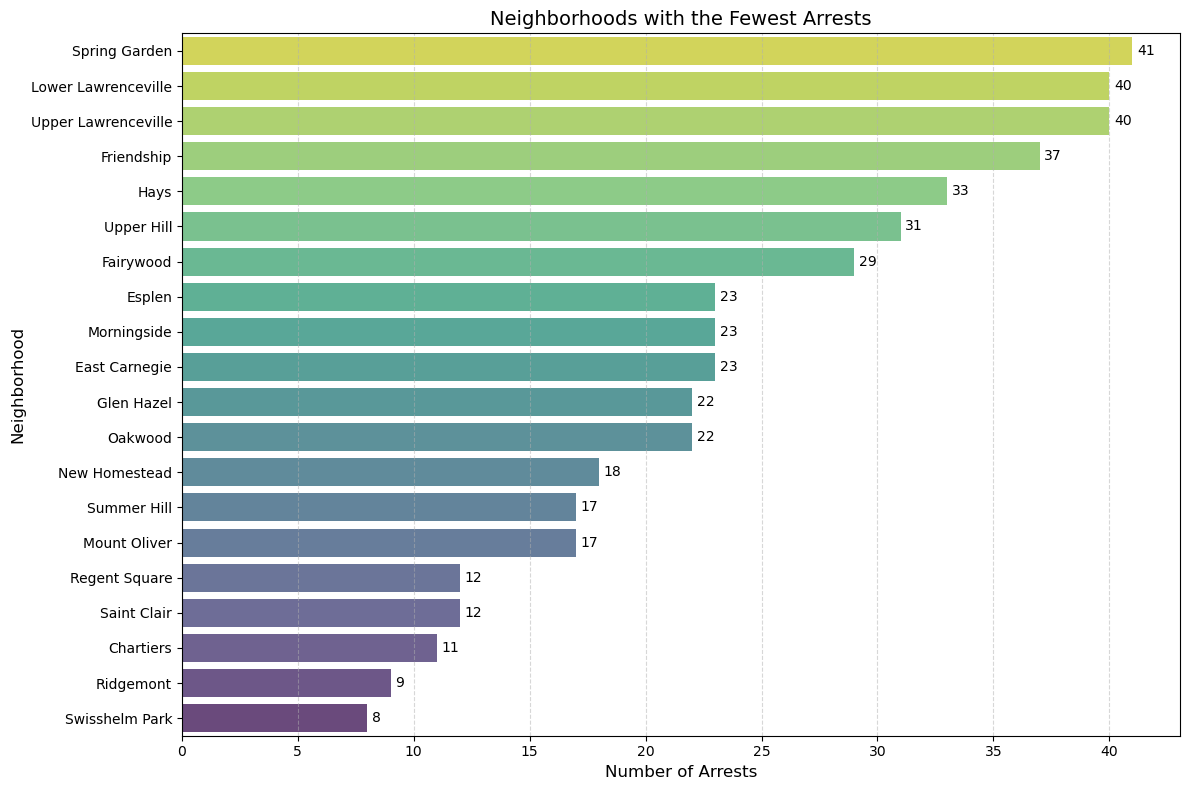

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv("arrests.csv")

# Compute the 20 neighborhoods with the fewest arrests
bottom_20 = (
    data["Neighborhood"]
    .value_counts()
    .sort_values()
    .head(20)
)

# Plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x=bottom_20.values,
    y=bottom_20.index,
    palette="viridis",
    alpha=0.8
)

# Annotate bars with their values
for i, v in enumerate(bottom_20.values):
    ax.text(v + 0.2, i, str(v), va="center")

# Styling
ax.set_title("Neighborhoods with the Fewest Arrests", fontsize=14)
ax.set_xlabel("Number of Arrests", fontsize=12)
ax.set_ylabel("Neighborhood", fontsize=12)
ax.grid(axis="x", linestyle="--", alpha=0.5)

# Optionally invert so the smallest is at the top
ax.invert_yaxis()

plt.tight_layout()
plt.show()


In [11]:
import pandas as pd
from tabulate import tabulate

# Load the arrests dataset
arrests_data = pd.read_csv("arrests.csv")

# Group by neighborhood and count arrests
arrests_per_neighborhood = (
    arrests_data['Neighborhood']
    .value_counts()
    .reset_index(name='Total Arrests')
    .rename(columns={'index': 'Neighborhood'})
)

# Sort ascending (fewest arrests first) and take the first 20
least_20 = arrests_per_neighborhood.sort_values('Total Arrests').head(20)

# Display in a fancy table
print(tabulate(least_20, headers='keys', tablefmt='fancy_grid'))


╒════╤═════════════════════╤═════════════════╕
│    │ Neighborhood        │   Total Arrests │
╞════╪═════════════════════╪═════════════════╡
│ 90 │ Swisshelm Park      │               8 │
├────┼─────────────────────┼─────────────────┤
│ 89 │ Ridgemont           │               9 │
├────┼─────────────────────┼─────────────────┤
│ 88 │ Chartiers           │              11 │
├────┼─────────────────────┼─────────────────┤
│ 87 │ Saint Clair         │              12 │
├────┼─────────────────────┼─────────────────┤
│ 86 │ Regent Square       │              12 │
├────┼─────────────────────┼─────────────────┤
│ 85 │ Mount Oliver        │              17 │
├────┼─────────────────────┼─────────────────┤
│ 84 │ Summer Hill         │              17 │
├────┼─────────────────────┼─────────────────┤
│ 83 │ New Homestead       │              18 │
├────┼─────────────────────┼─────────────────┤
│ 82 │ Oakwood             │              22 │
├────┼─────────────────────┼─────────────────┤
│ 81 │ Glen H

In [6]:
import pandas as pd

# Load the arrests dataset
arrests_data = pd.read_csv("arrests.csv")

# Count total arrests per neighborhood (case-insensitive column fix)
arrests_grouped = arrests_data.groupby('Neighborhood', as_index=False).size()
arrests_grouped.columns = ['neighborhood', 'total_arrests']

# Score: lower arrests = higher safety score
arrests_grouped['safety_score'] = 1 - (arrests_grouped['total_arrests'] / arrests_grouped['total_arrests'].max())

# Preview safest neighborhoods
print(arrests_grouped.sort_values(by='safety_score', ascending=False).head())


      neighborhood  total_arrests  safety_score
82  Swisshelm Park              8      0.997117
67       Ridgemont              9      0.996757
20       Chartiers             11      0.996036
66   Regent Square             12      0.995676
68     Saint Clair             12      0.995676


# Playground Bar Bar Graph

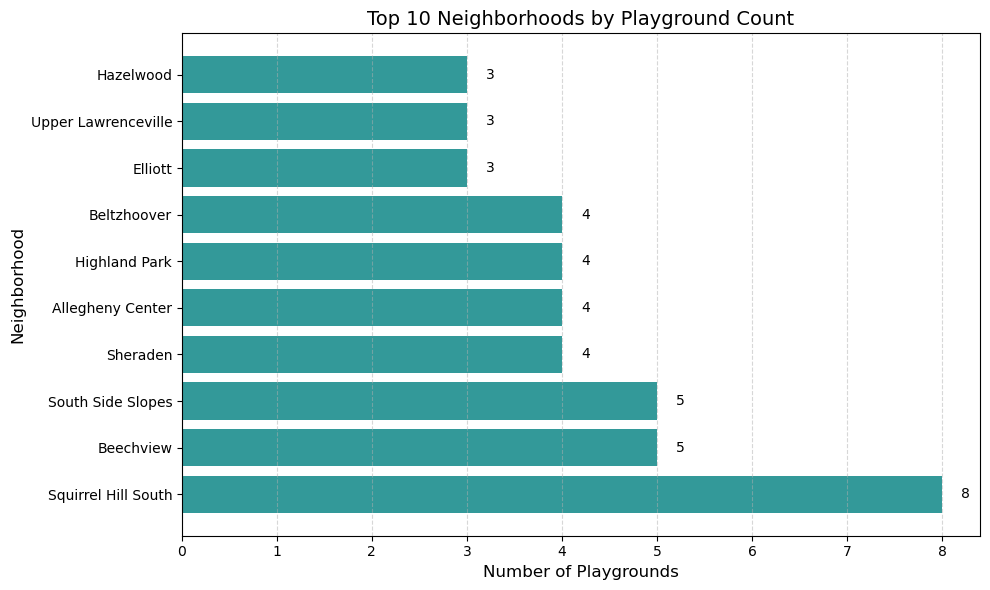

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("playgrounds.csv")

# Get the top 10 neighborhoods by playground count, then sort ascending
counts = df["neighborhood"].value_counts().head(10).sort_values()

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(counts.index, counts.values, color="teal", alpha=0.8)

# Annotate each bar with its value
for bar in bars:
    w = bar.get_width()
    plt.text(w + 0.2, bar.get_y() + bar.get_height()/2,
             str(int(w)), va="center")

# Styling
plt.title("Top 10 Neighborhoods by Playground Count", fontsize=14)
plt.xlabel("Number of Playgrounds", fontsize=12)
plt.ylabel("Neighborhood", fontsize=12)
plt.gca().invert_yaxis()               # highest at top
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [4]:
import pandas as pd
from tabulate import tabulate

# Load your dataset (replace 'your_playground_dataset.csv' with the actual file path)
playground_data = pd.read_csv("playgrounds.csv")

playgrounds_per_neighborhood = playground_data['neighborhood'].value_counts()

# DataFrame for better formatting
playgrounds_table = pd.DataFrame({'Neighborhood': playgrounds_per_neighborhood.index, 'Playgrounds Count': playgrounds_per_neighborhood.values})

# Print the formatted table for the top 20 rows
print(tabulate(playgrounds_table.head(20), headers='keys', tablefmt='fancy_grid'))


╒════╤══════════════════════════╤═════════════════════╕
│    │ Neighborhood             │   Playgrounds Count │
╞════╪══════════════════════════╪═════════════════════╡
│  0 │ Squirrel Hill South      │                   8 │
├────┼──────────────────────────┼─────────────────────┤
│  1 │ South Side Slopes        │                   5 │
├────┼──────────────────────────┼─────────────────────┤
│  2 │ Beechview                │                   5 │
├────┼──────────────────────────┼─────────────────────┤
│  3 │ Beltzhoover              │                   4 │
├────┼──────────────────────────┼─────────────────────┤
│  4 │ Sheraden                 │                   4 │
├────┼──────────────────────────┼─────────────────────┤
│  5 │ Allegheny Center         │                   4 │
├────┼──────────────────────────┼─────────────────────┤
│  6 │ Highland Park            │                   4 │
├────┼──────────────────────────┼─────────────────────┤
│  7 │ Hazelwood                │               

In [9]:
import pandas as pd

# Load and score playground data
playground_data = pd.read_csv("playgrounds.csv")
playgrounds_grouped = playground_data.groupby('neighborhood', as_index=False).size()
playgrounds_grouped.columns = ['neighborhood', 'playgrounds_count']

# Use total playgrounds for score instead of max
total_playgrounds = playgrounds_grouped['playgrounds_count'].sum()
playgrounds_grouped['playgrounds_score'] = playgrounds_grouped['playgrounds_count'] / total_playgrounds

# Show top playground neighborhoods
print(playgrounds_grouped.sort_values(by='playgrounds_score', ascending=False).head())


           neighborhood  playgrounds_count  playgrounds_score
56  Squirrel Hill South                  8              0.064
52    South Side Slopes                  5              0.040
4             Beechview                  5              0.040
29        Highland Park                  4              0.032
5           Beltzhoover                  4              0.032


# Enrolled Students Bar Graph

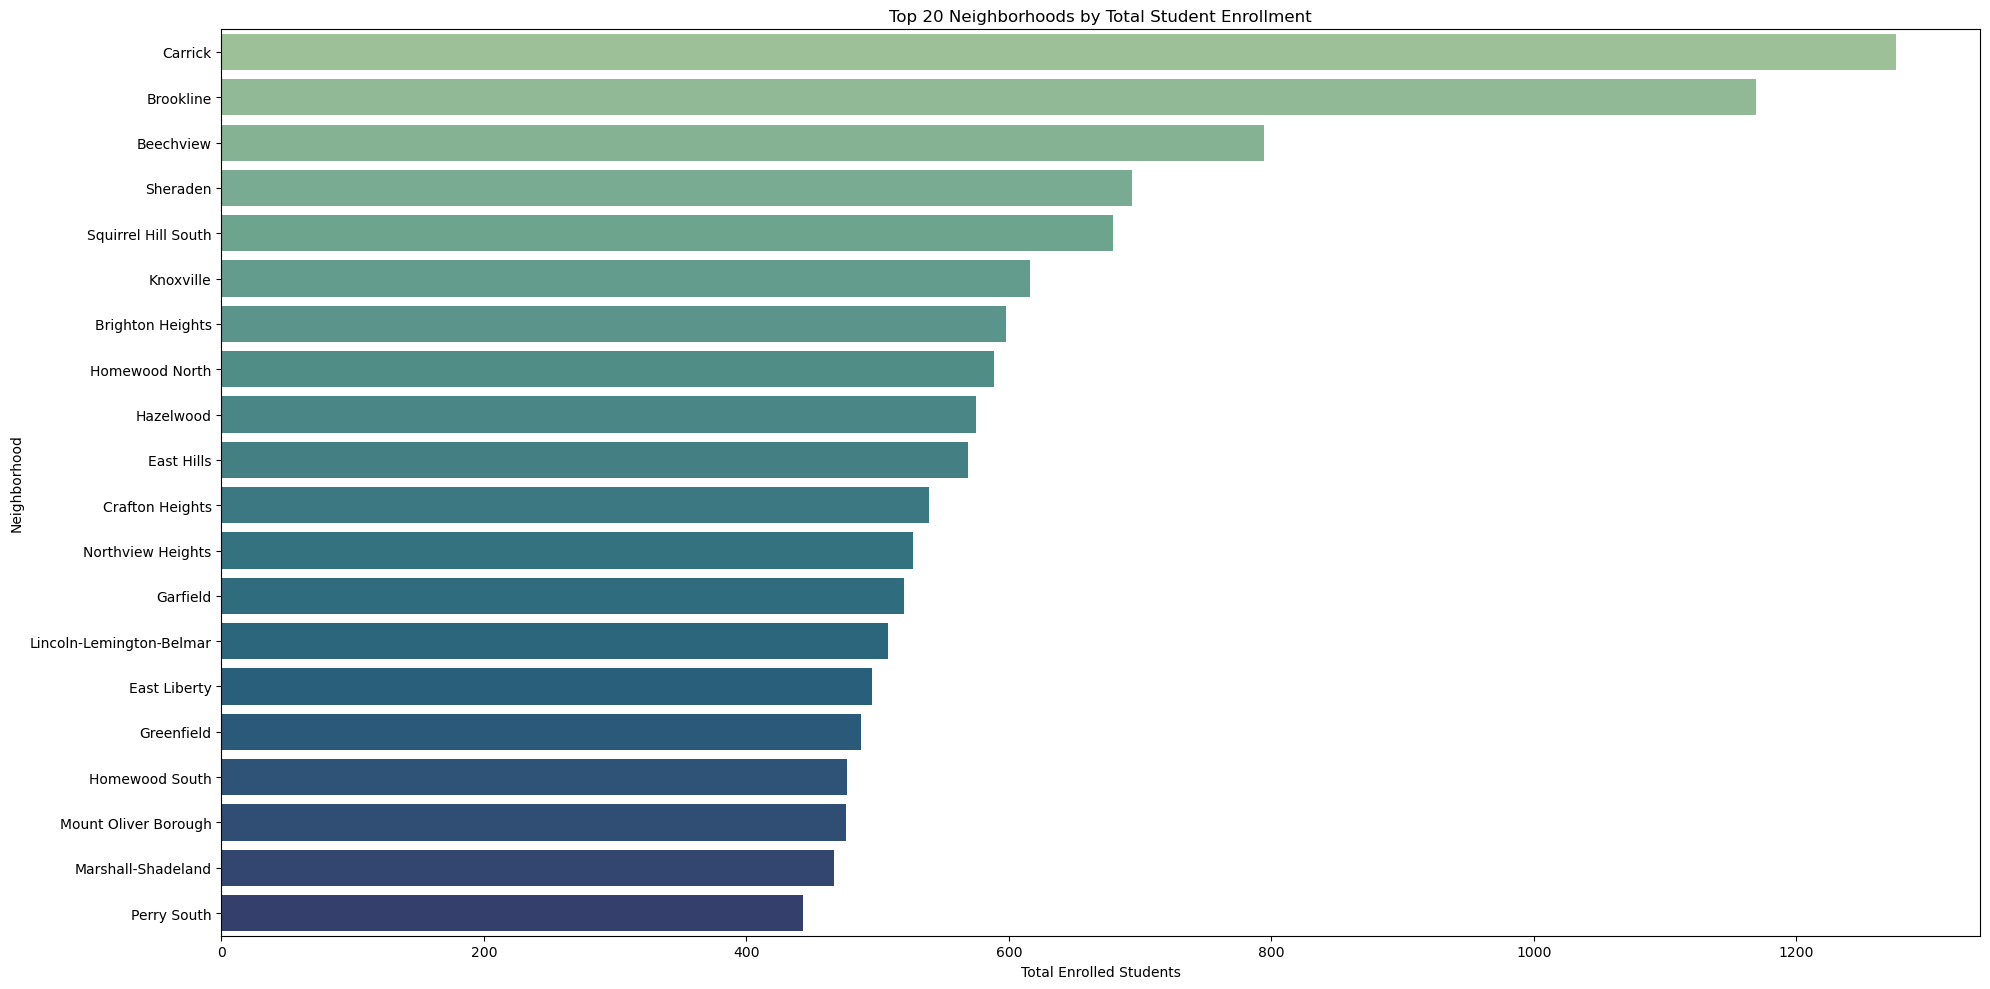

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("special enrollment.csv")

# Group by neighborhood and sum enrolled students
enrollment_per_neighborhood = data.groupby('neighborhood')['enrolled_students'].sum()

# Sort and optionally get the top or bottom neighborhoods (e.g., top 20)
top_20_enrollment = enrollment_per_neighborhood.sort_values(ascending=False).head(20)

# Plotting
plt.figure(figsize=(20, 10))
sns.barplot(x=top_20_enrollment.values, y=top_20_enrollment.index, palette='crest')
plt.title('Top 20 Neighborhoods by Total Student Enrollment')
plt.xlabel('Total Enrolled Students')
plt.ylabel('Neighborhood')
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd
from tabulate import tabulate

# Load the dataset
enrollment_data = pd.read_csv("special enrollment.csv")

# Group by neighborhood and sum the number of enrolled students
students_per_neighborhood = enrollment_data.groupby('neighborhood')['enrolled_students'].sum().reset_index()

# Rename columns for clarity
students_per_neighborhood.columns = ['Neighborhood', 'Total Enrolled Students']

# Sort neighborhoods by total enrolled students in descending order
students_per_neighborhood = students_per_neighborhood.sort_values(by='Total Enrolled Students', ascending=False)

# Display the top 20 neighborhoods in a formatted table
print(tabulate(students_per_neighborhood.head(20), headers='keys', tablefmt='fancy_grid'))


╒════╤══════════════════════════╤═══════════════════════════╕
│    │ Neighborhood             │   Total Enrolled Students │
╞════╪══════════════════════════╪═══════════════════════════╡
│ 14 │ Carrick                  │                      1276 │
├────┼──────────────────────────┼───────────────────────────┤
│ 12 │ Brookline                │                      1169 │
├────┼──────────────────────────┼───────────────────────────┤
│  6 │ Beechview                │                       794 │
├────┼──────────────────────────┼───────────────────────────┤
│ 67 │ Sheraden                 │                       694 │
├────┼──────────────────────────┼───────────────────────────┤
│ 74 │ Squirrel Hill South      │                       679 │
├────┼──────────────────────────┼───────────────────────────┤
│ 41 │ Knoxville                │                       616 │
├────┼──────────────────────────┼───────────────────────────┤
│ 11 │ Brighton Heights         │                       598 │
├────┼──

In [12]:
import pandas as pd

# Load and score enrollment data
enrollment_data = pd.read_csv("special enrollment.csv")
enrollment_grouped = enrollment_data.groupby('neighborhood', as_index=False)['enrolled_students'].sum()
enrollment_grouped['enrollment_score'] = enrollment_grouped['enrolled_students'] / 22352

# Preview top neighborhoods by enrollment score
print(enrollment_grouped.sort_values(by='enrollment_score', ascending=False).head())

# Print total enrolled students
print("Total enrolled students across all neighborhoods:", enrollment_grouped['enrolled_students'].sum())



           neighborhood  enrolled_students  enrollment_score
14              Carrick               1276          0.057087
12            Brookline               1169          0.052300
6             Beechview                794          0.035523
67             Sheraden                694          0.031049
74  Squirrel Hill South                679          0.030378
Total enrolled students across all neighborhoods: 22352


# Metric Analysis

In [4]:
import pandas as pd

# Load all three datasets
enrollment_data = pd.read_csv("special enrollment.csv")
playground_data = pd.read_csv("playgrounds.csv")
arrests_data = pd.read_csv("arrests.csv")

# --- ENROLLMENT ---
enrollment_grouped = enrollment_data.groupby('neighborhood', as_index=False)['enrolled_students'].sum()
total_enrollment = enrollment_grouped['enrolled_students'].sum()
enrollment_grouped['enrollment_score'] = enrollment_grouped['enrolled_students'] / total_enrollment

# --- PLAYGROUNDS ---
playgrounds_grouped = playground_data.groupby('neighborhood', as_index=False).size()
playgrounds_grouped.columns = ['neighborhood', 'playgrounds_count']
total_playgrounds = playgrounds_grouped['playgrounds_count'].sum()
playgrounds_grouped['playgrounds_score'] = playgrounds_grouped['playgrounds_count'] / total_playgrounds

# --- ARRESTS ---
arrests_grouped = arrests_data.groupby('Neighborhood', as_index=False).size()
arrests_grouped.columns = ['neighborhood', 'total_arrests']
total_arrests = arrests_grouped['total_arrests'].sum()
arrests_grouped['safety_score'] = 1 - (arrests_grouped['total_arrests'] / total_arrests)

# --- COMBINE ALL SCORES ---
combined = pd.merge(enrollment_grouped[['neighborhood', 'enrollment_score']], arrests_grouped[['neighborhood', 'safety_score']], on='neighborhood', how='outer')
combined = pd.merge(combined, playgrounds_grouped[['neighborhood', 'playgrounds_score']], on='neighborhood', how='outer')

# Replace missing scores with 0
combined.fillna(0, inplace=True)

# Apply weights
weights = {
    'enrollment_score': 0.35,
    'playgrounds_score': 0.20,
    'safety_score': 0.45
}

combined['final_score'] = (
    combined['enrollment_score'] * weights['enrollment_score'] +
    combined['playgrounds_score'] * weights['playgrounds_score'] +
    combined['safety_score'] * weights['safety_score']
)

# Sort and show best neighborhoods
best_neighborhoods = combined.sort_values(by='final_score', ascending=False)
print(best_neighborhoods.head(10))


           neighborhood  enrollment_score  safety_score  playgrounds_score  \
74  Squirrel Hill South          0.030378      0.989353              0.064   
6             Beechview          0.035523      0.991216              0.040   
12            Brookline          0.052300      0.985413              0.016   
14              Carrick          0.057087      0.969123              0.024   
67             Sheraden          0.031049      0.984561              0.032   
37        Highland Park          0.018432      0.993558              0.032   
7           Beltzhoover          0.011319      0.995315              0.032   
36            Hazelwood          0.025725      0.987330              0.024   
34           Greenfield          0.021788      0.993771              0.016   
19      Crafton Heights          0.024114      0.991748              0.016   

    final_score  
74     0.468641  
6      0.466480  
12     0.464941  
14     0.460886  
67     0.460320  
37     0.459953  
7      0.458253

# Conclusion

### 🏆 Conclusion: Best Neighborhood in Pittsburgh

According to the final composite metric—which combines **enrollment (35%)**, **playground availability (20%)**, and **safety (45%)**—the best neighborhood in Pittsburgh is **Squirrel Hill South**. It achieved the **highest overall score** due to its excellent safety rating and a strong balance of educational and recreational infrastructure. These factors make it the top-performing and most well-rounded neighborhood in our data-driven analysis.
